### Predicting Insurance Claim Amounts
**Author:**  Areeba Ali

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


### Load DataSet

In [2]:
df = pd.read_csv('insurance.csv')
print(df.shape)
print(df.columns)
print(df.head())

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


### Initial Data Inspection

In [3]:
print(df.isnull().sum())
print(df.describe())
print(df.info())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    133

### Exploratory Data Analysis 
- Visualize BMI, age, and smoking status impact on charges.
- Visualize charges by BMI.
- Visualize charges by age.

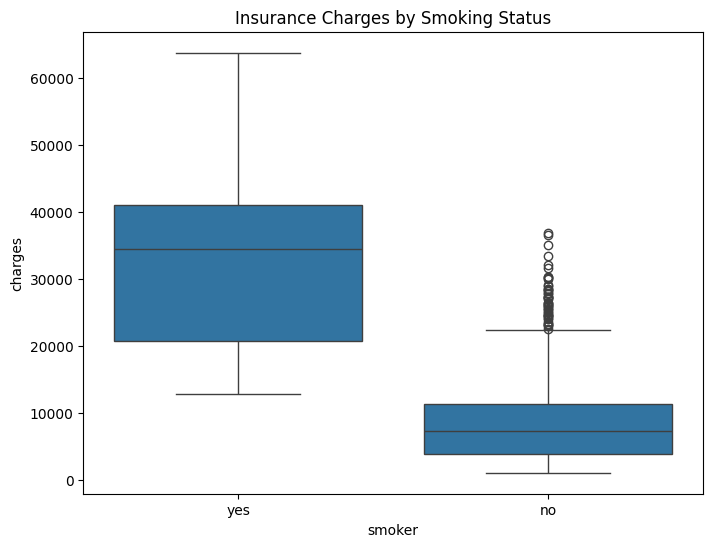

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance Charges by Smoking Status')
plt.show()

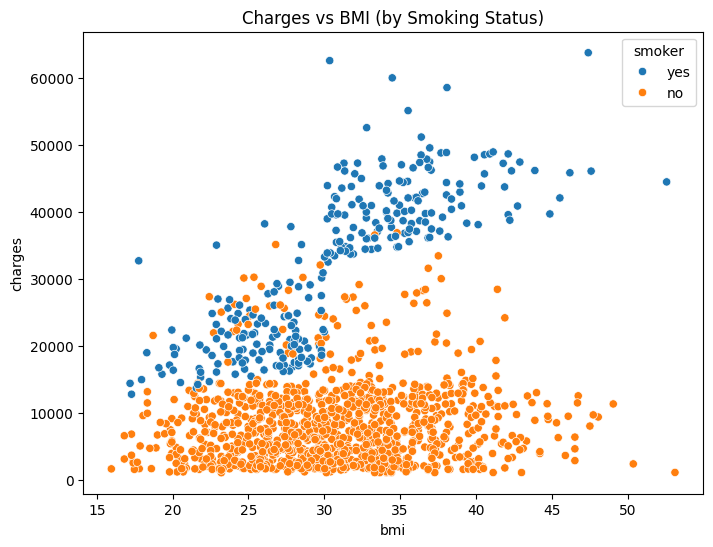

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Charges vs BMI (by Smoking Status)')
plt.show()

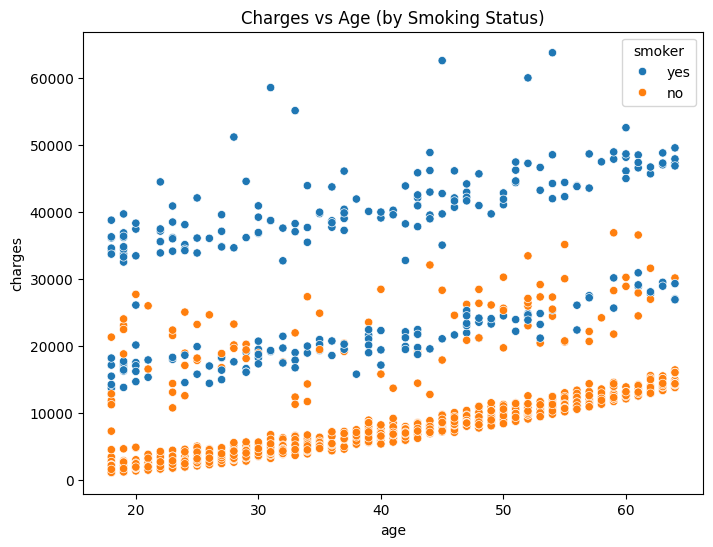

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Charges vs Age (by Smoking Status)')
plt.show()

### Data Preprocessing
- Encode categorical data

In [7]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

### Feature Vector & Target Values

In [8]:
X = df.drop(columns='charges')
y = df['charges']

### Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
# Y Prediction
y_pred = model.predict(X_test)

### Model Evaluation
- Mean Square Error

In [11]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 4186.508898366432
RMSE: 5799.587091438356


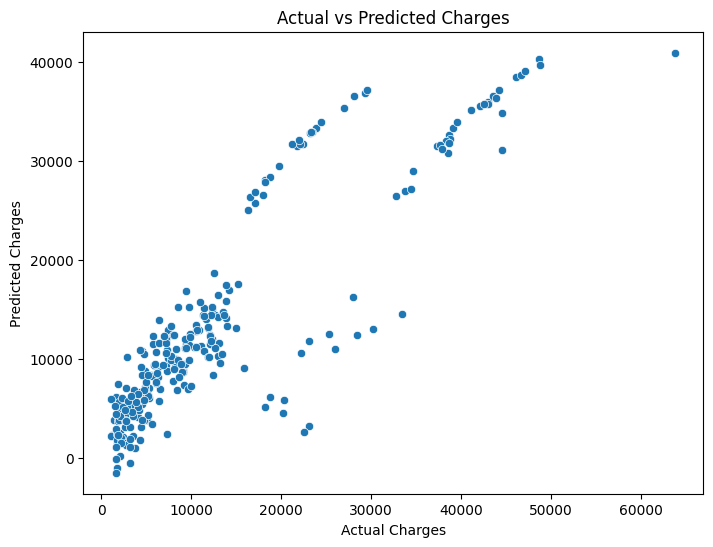

In [12]:
# Plotting Actual vs Predicted Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

### Conclusion
#### Key Insights
- Linear Regression captured the overall trend but may underperform for outliers (e.g., high charges for smokers).
- Smoking status and BMI have strong impacts on insurance charges.
- The model’s RMSE of **5799.587091438356** .
#### References
- Dataset: [Kaggle - Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)
- pandas: [pandas Documentation](https://pandas.pydata.org/docs/)
- seaborn: [seaborn Documentation](https://seaborn.pydata.org/)
- matplotlib: [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- scikit-learn: [scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)